## Model Building

### After completion of exploratory data analysis, the process of model development is carried out. The required libraries are imported with dataset.

In [1]:
#Modeling Building

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df=pd.read_csv("/Users/arjunrumba/Documents/ds_project/eda_data.csv")
print(df.head())

   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

### The relevant columns are selected. 

In [23]:
#choose relevant columns
print(df.columns)

df_model=[['Avg_Salary','Rating', 'Size','Type of ownership','Industry','Sector','Revenue','Num_Comp','Hourly','Provided Salary','Job_State','Same_State','Age','Python','Statistics','Web_Scrapping','Tableau', 'Job_Simp','Seniority','Desc_Len']]

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Provided Salary', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'Company_txt', 'Location_Name', 'Same_State', 'Age', 'Python',
       'Statistics', 'Web_Scrapping', 'Tableau', 'SQL', 'R_Studio', 'Power_BI',
       'AWS', 'Excel', 'Job_Simp', 'Seniority', 'Job_State', 'Desc_Len',
       'Num_Comp'],
      dtype='object')


In [24]:
#get dummy variables
df_dummy=pd.get_dummies(df[['Avg_Salary','Rating', 'Size','Type of ownership','Industry','Sector','Revenue','Num_Comp','Hourly','Provided Salary','Job_State','Same_State','Age','Python','Statistics','Web_Scrapping','Tableau', 'Job_Simp','Seniority','Desc_Len']])

In [25]:
df_dummy

,Avg_Salary,Rating,Num_Comp,Hourly,Provided Salary,Same_State,Age,Python,Statistics,Web_Scrapping,...,Job_Simp_analyst,Job_Simp_data engineer,Job_Simp_data scientist,Job_Simp_director,Job_Simp_machine learning,Job_Simp_manager,Job_Simp_na,Seniority_junior,Seniority_na,Seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,190,0,0,0,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,14,1,0,0,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,36,0,1,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### The data split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. The test data will be used to test model's prediction. 

In [26]:
#train test split
from sklearn.model_selection import train_test_split

x=df_dummy.drop('Avg_Salary', axis=1)
y=df_dummy.Avg_Salary.values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Three different models are in use. 
### They are Multiple Linear Regression, LASSO Regression and Random Forest.

In [6]:
#multiple linear regression
import statsmodels.api as sm

x_sm =sm.add_constant(x)
model=sm.OLS(y, x_sm)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     10.36
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           9.86e-96
Time:                        12:28:02   Log-Likelihood:                -3307.9
No. Observations:                 742   AIC:                             6902.
Df Residuals:                     599   BIC:                             7561.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/Users/arjunrumba/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Cross validation score compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [31]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm=LinearRegression()
lm.fit(x_train, y_train)

score=np.mean(cross_val_score(lm,x_train,y_train, scoring='neg_mean_absolute_error',cv=2))
print(f"Error_MLG: {score}")

Error_MLG: -23.363553052176446


In [8]:
#lasso regression
lm_l=Lasso(alpha=.13)
lm_l.fit(x_train, y_train)
score_l=np.mean(cross_val_score(lm_l,x_train,y_train, scoring='neg_mean_absolute_error',cv=2))
print(f"Error_lasso: {score_l}")

Error_lasso: -20.60382978212464


Error_lasso: -21.562128290275922


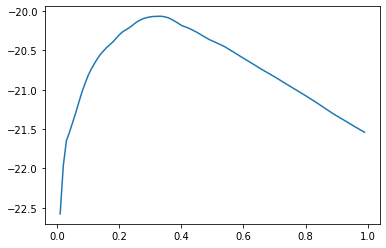

In [9]:
#lasso regression
lm_l=Lasso()
lm_l.fit(x_train, y_train)
score_l=np.mean(cross_val_score(lm_l,x_train,y_train, scoring='neg_mean_absolute_error',cv=2))
print(f"Error_lasso: {score_l}")

alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train, scoring='neg_mean_absolute_error',cv=2)))
    

err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

plt.plot(alpha,error)

In [10]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
32,0.33,-20.066449


In [14]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

score_rf=(np.mean(cross_val_score(rf, x_train, y_train, scoring='neg_mean_absolute_error',cv=2)))
print(f"Error_RF: {score_rf}")

Error_RF: -17.651340260715262


/Users/arjunrumba/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

In [15]:
#tune model gridsearchcv
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=2)
gs.fit(x_train,y_train)

/Users/arjunrumba/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
      

### Random Forest is the best model shown by Grid Search. 

### best_score_ is used to print the mean cross-validated score of the best_estimator. 

In [18]:
gs.best_score_

-16.784480981824995

### best_estimator_ is used to print the best estimator.

In [17]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=180,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### The models are used to predict the test set data.

In [19]:
#test ensembles
tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

[ 1.07736926e+02  4.84933247e+01  1.22238709e+02  1.07571257e+02
  1.52756104e+02  1.39314700e+02  1.37404720e+02  2.76882257e+01
  4.72997061e+01  8.05809764e+01  1.50146806e+02  8.72137582e+01
  1.20950914e+02  1.33721472e+02  4.16209068e+01  1.43504493e+02
  5.40425358e+06  6.64389526e+01  1.24172620e+02  8.82449152e+01
  1.01536269e+02  1.10589782e+02  1.54907127e+02  1.09574427e+02
  1.52499515e+02  1.03927207e+02  7.45389745e+01  1.36348164e+02
  9.97769495e+01  1.09003340e+02  6.45263598e+01  5.19548658e+01
  1.40509306e+02  1.05365917e+02  1.04698750e+02  8.13599248e+01
  7.59296067e+01  1.13051258e+02  6.45577214e+01  1.18916648e+02
  1.71353976e+02  1.12974745e+02  7.63572725e+01  1.04616185e+02
  1.59474124e+02  8.55778822e+01  1.54544677e+02  3.40718812e+06
  1.42459031e+02  8.71771519e+01  1.17394981e+02  1.21746361e+02
  1.05120380e+02  1.00336695e+02  9.26670224e+01  1.27171962e+02
  7.63572725e+01  8.50853264e+01  1.70998202e+02  1.37480070e+02
  1.22095443e+02  1.13603

### Mean absolute error is one of the evaluation metrics in regression models. In the context of regression, the error of the model is the difference between the data points and the trend line generated by the algorithm. Mean absolute error is the mean of the absolute value of the errors. This is the easiest of the metrics to understand, since it's just the average error.

In [30]:
from sklearn.metrics import mean_absolute_error

p_lm=mean_absolute_error(y_test,tpred_lm)
print(f"Linear Regression : MAE = {p_lm}")
p_lml=mean_absolute_error(y_test,tpred_lml)
print(f"LASSO Regression : MAE = {p_lml}")
p_rf=mean_absolute_error(y_test,tpred_rf)
print(f"Random Forest : MAE = {p_rf}")

Linear Regression : MAE = 822877862.1200092
LASSO Regression : MAE = 23.40219396588572
Random Forest : MAE = 11.115277777777775


### The Random Forest model performs better (MAE = 11.11) than other models on the test and validation sets.